In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:

data = pd.read_csv('diabetes_data_upload.csv')

In [3]:
data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [4]:
data.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [6]:
data.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [38]:
def preprocessing_inputs(df):
    df =df.copy()
    #
    df['Gender'] = df['Gender'].replace({'Male': 0, 'Female' : 1})
    #
    for column in df.columns.drop(['Age','Gender','class']):
        df[column] = df[column].replace({'No': 0,'Yes' : 1})
    # split data 
    y = df['class']
    X = df.drop(['class'],axis = 'columns')
    # train y,X
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
    return X_train,X_test,y_train,y_test

In [39]:

X_train,X_test,y_train,y_test = preprocessing_inputs(data)

In [40]:

X_train

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
339,55,1,1,1,1,0,1,0,0,1,0,1,1,0,0,0
506,61,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0
218,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
257,48,1,1,1,0,1,0,0,1,1,0,1,1,0,0,0
33,54,0,1,1,1,1,0,0,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,54,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0
83,48,1,1,1,0,1,0,0,1,1,0,1,1,0,0,0
321,34,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
119,34,1,1,1,0,1,0,0,0,0,1,0,0,1,0,0


In [41]:
{column : len(X[column].unique())for column in X.columns}

{'Age': 51,
 'Gender': 2,
 'Polyuria': 2,
 'Polydipsia': 2,
 'sudden weight loss': 2,
 'weakness': 2,
 'Polyphagia': 2,
 'Genital thrush': 2,
 'visual blurring': 2,
 'Itching': 2,
 'Irritability': 2,
 'delayed healing': 2,
 'partial paresis': 2,
 'muscle stiffness': 2,
 'Alopecia': 2,
 'Obesity': 2}

In [42]:
X_test

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
397,46,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0
446,50,1,1,1,1,0,1,0,0,0,0,1,1,0,0,0
77,55,1,1,1,1,0,1,0,0,1,0,1,1,0,0,0
462,57,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
414,55,1,1,1,1,1,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,30,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
138,51,0,1,1,1,1,0,1,0,0,1,1,1,0,1,0
253,43,1,1,1,1,1,1,0,1,0,0,0,1,1,0,1
127,57,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0


In [43]:
y_test

397    Negative
446    Positive
77     Positive
462    Negative
414    Positive
         ...   
227    Negative
138    Positive
253    Positive
127    Positive
297    Positive
Name: class, Length: 104, dtype: object

In [30]:
X.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,Positive
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Positive
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,Positive
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,Positive
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,Positive


In [44]:
y_train

339    Positive
506    Negative
218    Negative
257    Positive
33     Positive
         ...   
514    Positive
83     Positive
321    Negative
119    Positive
436    Positive
Name: class, Length: 416, dtype: object

In [46]:
from sklearn.linear_model  import LogisticRegression 
rog = LogisticRegression()

In [47]:
rog.fit(X_train,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
rog.score(X_test,y_test)

0.9230769230769231

In [49]:
from sklearn.svm import SVC
svm = SVC()

In [50]:
svm.fit(X_train,y_train)

SVC()

In [51]:
svm.score(X_test,y_test)

0.6153846153846154

In [52]:
svm = SVC(gamma = 'auto',C=100,kernel = 'linear')

In [53]:
svm.fit(X_train,y_train)

SVC(C=100, gamma='auto', kernel='linear')

In [54]:
svm.score(X_test,y_test)

0.9134615384615384

In [56]:
y_pred = svm.predict(X_test)

In [57]:
y_pred

array(['Negative', 'Positive', 'Positive', 'Negative', 'Positive',
       'Positive', 'Negative', 'Positive', 'Negative', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Negative', 'Negative', 'Negative', 'Positive',
       'Positive', 'Positive', 'Positive', 'Negative', 'Positive',
       'Positive', 'Negative', 'Positive', 'Positive', 'Positive',
       'Negative', 'Negative', 'Positive', 'Negative', 'Negative',
       'Positive', 'Positive', 'Positive', 'Negative', 'Negative',
       'Negative', 'Positive', 'Positive', 'Negative', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Negative', 'Negative', 'Negative', 'Positive',
       'Positive', 'Positive', 'Negative', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Negative', 'Positive', 'Positive', 'Positive', 'Positive',
       'Negative', 'Positive', 'Positive', 'Negative', 'Negati

In [55]:
import matplotlib.pyplot as plt
import seaborn as sn

In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
cm = confusion_matrix(y_test,y_pred)

In [60]:
cm

array([[35,  5],
       [ 4, 60]], dtype=int64)

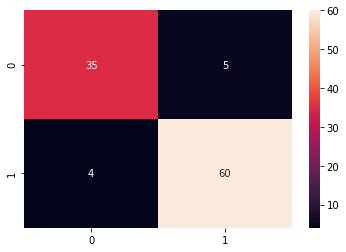

In [61]:

sn.heatmap(cm,annot = True)

In [72]:
import numpy as np

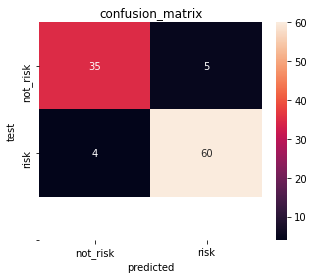

In [78]:
plt.figure(figsize  = (5,4))
sn.heatmap(cm,annot =True)
plt.xlabel('predicted')
plt.ylabel('test')
plt.title('confusion_matrix')
plt.xticks(np.arange(2) + 0.5,['not_risk','risk'])
plt.yticks(np.arange(3) + 0.5,['not_risk','risk'])
plt.show()

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [80]:
models = {
        "Logistic Regression": LogisticRegression(),
                      
    "Decision Tree"          : DecisionTreeClassifier(),
    
      
                         
    " Random Forest"         : RandomForestClassifier(),
                       
}
for name,model in models.items():
    model.fit(X_train,y_train)
    print(name + 'Trainned')

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic RegressionTrainned
Decision TreeTrainned
 Random ForestTrainned


In [82]:
for name,model in models.items():
    print(name + 'Accuracy : {:2f}'.format(model.score(X_test,y_test)))

Logistic RegressionAccuracy : 0.923077
Decision TreeAccuracy : 0.980769
 Random ForestAccuracy : 0.990385
